<h2> 3.6 Featurizing text data with tfidf  </h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm
import datetime
import joblib

import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import datetime
import joblib
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
#import spacy

In [2]:
# avoid decoding problems
df = pd.read_csv("train.csv")
 
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

startTime3 = datetime.datetime.now()
print("Current Time = ",startTime3)

ques_1_train = list(df['question1'][:70000]) 
ques_1_test = list(df['question1'][70000:100000]) 

ques_2_train = list(df['question2'][:70000])
ques_2_test = list(df['question2'][70000:100000]) 

tfidf = TfidfVectorizer(lowercase=False,max_features=384 )
ques_1_train_tfidf = tfidf.fit_transform(ques_1_train)
ques_1_test_tfidf = tfidf.transform(ques_1_test)

ques_2_train_tfidf = tfidf.fit_transform(ques_2_train)
ques_2_test_tfidf = tfidf.transform(ques_2_test)

print("Time taken to run this cell {}".format(datetime.datetime.now() - startTime3))

Current Time =  2019-05-15 15:29:07.249978
Time taken to run this cell 0:00:11.175635


In [4]:
ques_1_train_tfidf_df = pd.DataFrame(ques_1_train_tfidf.toarray())
ques_1_test_tfidf_df = pd.DataFrame(ques_1_test_tfidf.toarray())

ques_2_train_tfidf_df = pd.DataFrame(ques_2_train_tfidf.toarray())
ques_2_test_tfidf_df = pd.DataFrame(ques_2_test_tfidf.toarray())

ques_2_test_tfidf_df[:10]

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [6]:
df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

In [7]:
# dataframe of nlp features
df1.head()

,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667
3,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,36,36,35,40,0.039216
4,4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,46,56,0.175000


In [8]:
df1_train = df1[:70000]
df1_test = df1[70000:100000]
df1_test[:10]

,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
70000,70000,1,0.666644,0.666644,0.999967,0.599988,0.833319,0.624992,0.0,1.0,2.0,7.0,90,90,68,76,0.411765
70001,70001,0,0.399992,0.249997,0.000000,0.000000,0.153845,0.133332,0.0,0.0,2.0,14.0,64,61,41,42,0.220779
70002,70002,0,0.666644,0.499988,0.666644,0.499988,0.571420,0.571420,0.0,0.0,0.0,7.0,77,72,70,68,0.615385
70003,70003,0,0.999967,0.749981,0.999975,0.799984,0.999986,0.777769,0.0,1.0,2.0,8.0,100,87,87,100,0.972222
70004,70004,0,0.249997,0.249997,0.142855,0.083333,0.187499,0.124999,0.0,0.0,8.0,20.0,58,49,52,53,0.122642
70005,70005,0,0.499988,0.499988,0.499975,0.199996,0.499992,0.333330,0.0,0.0,3.0,7.5,69,69,60,76,0.384615
70006,70006,1,0.999967,0.749981,0.666644,0.666644,0.833319,0.714276,0.0,0.0,1.0,6.5,92,86,86,91,0.857143
70007,70007,1,0.666656,0.571420,0.749981,0.599988,0.699993,0.583328,1.0,1.0,2.0,11.0,83,67,75,70,0.403509
70008,70008,0,0.000000,0.000000,0.666644,0.249997,0.249997,0.142856,0.0,0.0,6.0,11.0,43,41,37,43,0.170213
70009,70009,0,0.999967,0.999967,0.599988,0.374995,0.749991,0.461535,1.0,0.0,5.0,10.5,84,68,70,75,0.682927


In [9]:
# data before preprocessing 
df2.head()

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [10]:
df2_train = df2[:70000]
df2_test = df2[70000:100000]
df2_test[:10]

,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
70000,70000,1,1,40,33,8,6,4.0,14.0,0.285714,2,0
70001,70001,1,1,77,76,12,14,1.0,25.0,0.040000,2,0
70002,70002,1,1,44,38,7,7,4.0,14.0,0.285714,2,0
70003,70003,1,1,45,35,8,6,5.0,14.0,0.357143,2,0
70004,70004,4,1,105,116,15,22,3.0,34.0,0.088235,5,3
70005,70005,1,1,47,38,9,6,2.0,15.0,0.133333,2,0
70006,70006,2,1,40,34,7,6,4.0,13.0,0.307692,3,1
70007,70007,1,1,56,69,10,12,7.0,22.0,0.318182,2,0
70008,70008,1,1,46,75,8,14,2.0,22.0,0.090909,2,0
70009,70009,1,1,54,40,12,8,6.0,19.0,0.315789,2,0


In [11]:
# dataframe of nlp features
df3.head()

,id
0,0
1,1
2,2
3,3
4,4


In [12]:
df3_train = df3[:70000]
df3_test = df3[70000:100000]
df3_test[:10]

,id
70000,70000
70001,70001
70002,70002
70003,70003
70004,70004
70005,70005
70006,70006
70007,70007
70008,70008
70009,70009


In [13]:
df3_q1_train = pd.DataFrame(ques_1_train_tfidf_df, index= df3_train.index)
df3_q1_test = pd.DataFrame(ques_1_test_tfidf_df, index= df3_test.index)

df3_q2_train = pd.DataFrame(ques_2_train_tfidf_df, index= df3_train.index)
df3_q2_test = pd.DataFrame(ques_2_test_tfidf_df, index= df3_test.index)

In [14]:
print("Number of features in nlp dataframe :", df1.shape[1])
print("Number of features in preprocessed dataframe :", df2.shape[1])
print("Number of features in question1 w2v  dataframe :", ques_1_train_tfidf_df.shape[1])
print("Number of features in question2 w2v  dataframe :", ques_1_test_tfidf_df.shape[1])
print("Number of features in final dataframe  :", df1.shape[1]+df2.shape[1]+ques_1_train_tfidf_df.shape[1]+ques_1_test_tfidf_df.shape[1])

Number of features in nlp dataframe : 17
Number of features in preprocessed dataframe : 12
Number of features in question1 w2v  dataframe : 384
Number of features in question2 w2v  dataframe : 384
Number of features in final dataframe  : 797


In [20]:
# storing the final features of train data to csv file
startTime3 = datetime.datetime.now()
print("Current Time = ",startTime3)

if not os.path.isfile('final_features_train_tfidf.csv'):
    df3_q1_train['id']=df1_train['id']
    df3_q2_train['id']=df1_train['id']
    df1_train  = df1_train.merge(df2_train, on='id',how='left')
    df2_train  = df3_q1_train.merge(df3_q2_train, on='id',how='left')
    result  = df1_train.merge(df2_train, on='id',how='left')
    result.to_csv('final_features_train_tfidf.csv')
    
print("Time taken to run this cell {}".format(datetime.datetime.now() - startTime3))

Current Time =  2019-05-13 15:24:37.252542
Time taken to run this cell 0:04:59.678311


In [15]:
final_features_train_tfidf = pd.read_csv("final_features_train_tfidf.csv")
final_features_train_tfidf[:5]

,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
0,0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,1,1,0,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,...,0.0,0.0,0.0,0.0,0.324061,0.0,0.0,0.0,0.0,0.0
2,2,2,0,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,3,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,4,4,0,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,...,0.0,0.0,0.0,0.0,0.503729,0.0,0.0,0.0,0.0,0.0


In [22]:
# storing the final features of test data to csv file
startTime = datetime.datetime.now()
print("Current Time = ",startTime)

if not os.path.isfile('final_features_test_tfidf.csv'):
    df3_q1_test['id']=df1_test['id']
    df3_q2_test['id']=df1_test['id']
    df1_test  = df1_test.merge(df2_test, on='id',how='left')
    df2_test  = df3_q1_test.merge(df3_q2_test, on='id',how='left')
    result_test  = df1_test.merge(df2_test, on='id',how='left')
    result_test.to_csv('final_features_test_tfidf.csv')
    
print("Time taken to run this cell {}".format(datetime.datetime.now() - startTime))

Current Time =  2019-05-13 15:30:34.551741
Time taken to run this cell 0:01:49.072173


In [16]:
final_features_test_tfidf = pd.read_csv("final_features_test_tfidf.csv")
final_features_test_tfidf[:5]

,Unnamed: 0,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
0,0,70000,1,0.666644,0.666644,0.999967,0.599988,0.833319,0.624992,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,70001,0,0.399992,0.249997,0.000000,0.000000,0.153845,0.133332,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,70002,0,0.666644,0.499988,0.666644,0.499988,0.571420,0.571420,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,70003,0,0.999967,0.749981,0.999975,0.799984,0.999986,0.777769,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,70004,0,0.249997,0.249997,0.142855,0.083333,0.187499,0.124999,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# remove the first row 
start = datetime.datetime.now()
print("Current Time = ",start)

final_features_train_tfidf.drop(final_features_train_tfidf.index[0], inplace=True)
y_true_train = final_features_train_tfidf['is_duplicate']
final_features_train_tfidf.drop(['Unnamed: 0', 'id','is_duplicate'], axis=1, inplace=True)

final_features_test_tfidf.drop(final_features_test_tfidf.index[0], inplace=True)
y_true_test = final_features_test_tfidf['is_duplicate']
final_features_test_tfidf.drop(['Unnamed: 0', 'id','is_duplicate'], axis=1, inplace=True)

current_time = datetime.datetime.now()
print("Time taken to run this cell: ",current_time-start)

Current Time =  2019-05-15 15:33:21.426267
Time taken to run this cell:  0:00:02.787742


In [18]:
final_features_train_tfidf.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,...,0.0,0.0,0.0,0.0,0.324061,0.0,0.0,0.0,0.0,0.0
2,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,...,0.0,0.0,0.0,0.0,0.503729,0.0,0.0,0.0,0.0,0.0
5,0.666656,0.571420,0.888879,0.799992,0.705878,0.705878,1.0,0.0,0.0,17.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [19]:
final_features_test_tfidf.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,0.399992,0.249997,0.000000,0.000000,0.153845,0.133332,0.0,0.0,2.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.666644,0.499988,0.666644,0.499988,0.571420,0.571420,0.0,0.0,0.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.999967,0.749981,0.999975,0.799984,0.999986,0.777769,0.0,1.0,2.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.249997,0.249997,0.142855,0.083333,0.187499,0.124999,0.0,0.0,8.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.499988,0.499988,0.499975,0.199996,0.499992,0.333330,0.0,0.0,3.0,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# resetting index
def reset_index(data_frame):
    data_frame = data_frame.reset_index()
    data_frame['index_col'] = data_frame.index

    data_frame = data_frame.drop("index", axis=1)
    data_frame = data_frame.drop("index_col", axis=1)
    return(data_frame)

In [ ]:
final_features_train_tfidf = reset_index(final_features_train_tfidf)
final_features_test_tfidf = reset_index(final_features_test_tfidf)

In [20]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true_train = list(map(int, y_true_train.values))
y_true_test = list(map(int, y_true_test.values))

In [21]:
print(np.shape(y_true_train))
print(np.shape(y_true_test))

(69999,)
(29999,)


<h2> Converting strings to numerics </h2>

In [22]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
start = datetime.datetime.now()
print("Current Time = ",start)

cols = list(final_features_train_tfidf.columns)
for i in cols:
    final_features_train_tfidf[i] = final_features_train_tfidf[i].apply(pd.to_numeric)
    print(i)
    
current_time = datetime.datetime.now()
print("Time taken to run this cell: ",current_time-start)

start2 = datetime.datetime.now()
print("Current Time = ",start2)
    
cols = list(final_features_test_tfidf.columns)
for i in cols:
    final_features_test_tfidf[i] = final_features_test_tfidf[i].apply(pd.to_numeric)
    print(i)
    
current_time = datetime.datetime.now()
print("Time taken to run this cell: ",current_time-start2)

Current Time =  2019-05-15 15:34:25.001111
cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
96_x
97_x
98_x
99_x
100_x
101_x
102_x
103_x
104_x
105_x
106_x
107_x
108_x
109_x
110_x
111_x
112_x
113_x
114_x
115_x
116_x
117_x
118_x
119_x
120_x
121_x
122_x
123_x
124_x
125_x
126_x
127_x
128_x
12

168_y
169_y
170_y
171_y
172_y
173_y
174_y
175_y
176_y
177_y
178_y
179_y
180_y
181_y
182_y
183_y
184_y
185_y
186_y
187_y
188_y
189_y
190_y
191_y
192_y
193_y
194_y
195_y
196_y
197_y
198_y
199_y
200_y
201_y
202_y
203_y
204_y
205_y
206_y
207_y
208_y
209_y
210_y
211_y
212_y
213_y
214_y
215_y
216_y
217_y
218_y
219_y
220_y
221_y
222_y
223_y
224_y
225_y
226_y
227_y
228_y
229_y
230_y
231_y
232_y
233_y
234_y
235_y
236_y
237_y
238_y
239_y
240_y
241_y
242_y
243_y
244_y
245_y
246_y
247_y
248_y
249_y
250_y
251_y
252_y
253_y
254_y
255_y
256_y
257_y
258_y
259_y
260_y
261_y
262_y
263_y
264_y
265_y
266_y
267_y
268_y
269_y
270_y
271_y
272_y
273_y
274_y
275_y
276_y
277_y
278_y
279_y
280_y
281_y
282_y
283_y
284_y
285_y
286_y
287_y
288_y
289_y
290_y
291_y
292_y
293_y
294_y
295_y
296_y
297_y
298_y
299_y
300_y
301_y
302_y
303_y
304_y
305_y
306_y
307_y
308_y
309_y
310_y
311_y
312_y
313_y
314_y
315_y
316_y
317_y
318_y
319_y
320_y
321_y
322_y
323_y
324_y
325_y
326_y
327_y
328_y
329_y
330_y
331_y
332_y
333_y
334_

In [23]:
X_train_tfidf = final_features_train_tfidf
X_test_tfidf = final_features_test_tfidf

y_train_tfidf = y_true_train
y_test_tfidf = y_true_test

print("Number of data points in train data :",X_train_tfidf.shape)
print("Number of data points in test data :",X_test_tfidf.shape)

import joblib                                       #  * DO NOT RUN *
joblib.dump(X_train_tfidf,"X_train_tfidf.pkl")
joblib.dump(X_test_tfidf,"X_test_tfidf.pkl")
joblib.dump(y_train_tfidf,"y_train_tfidf.pkl")
joblib.dump(y_test_tfidf,"y_test_tfidf.pkl")

Number of data points in train data : (69999, 794)
Number of data points in test data : (29999, 794)


['y_test_tfidf.pkl']

In [ ]:
#Loading the saved Train data frame
X_train_tfidf = joblib.load("X_train_tfidf.pkl")
X_test_tfidf = joblib.load("X_test_tfidf.pkl")

y_train_tfidf = joblib.load("y_train_tfidf.pkl")
y_test_tfidf = joblib.load("y_test_tfidf.pkl")

In [24]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
std_scal = StandardScaler(with_mean=False)
std_scal.fit(X_train_tfidf)
X_train_tfidf = std_scal.transform(X_train_tfidf)
X_test_tfidf = std_scal.transform(X_test_tfidf)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [25]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train_tfidf)
train_len = len(y_train_tfidf)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test_tfidf)
test_len = len(y_test_tfidf)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6275375362505179 Class 1:  0.3724624637494821
---------- Distribution of output variable in train data ----------
Class 0:  0.3727124237474582 Class 1:  0.3727124237474582


In [26]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [27]:
print(np.shape(X_train_tfidf))
print(np.shape(y_train_tfidf))

(69999, 794)
(69999,)


In [28]:
# checking for NaN values
def NaN_values(data_frame):
    bool_series = pd.isnull(data_frame) 
  
    # displayind data only with team = NaN 
    print("Number of rows with NaN values = ",len(data_frame[bool_series]))
    return (data_frame[bool_series][:10])

In [29]:
x = NaN_values(X_train_tfidf)
x

Number of rows with NaN values =  0


array([], dtype=float64)

In [ ]:
X_train_tfidf = np.nan_to_num(X_train_tfidf)   #Not required if there are no Null

In [30]:
x = NaN_values(X_test_tfidf)
x

Number of rows with NaN values =  23039232


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [31]:
X_test_tfidf = np.nan_to_num(X_test_tfidf)

In [32]:
x = NaN_values(X_test_tfidf)
x

Number of rows with NaN values =  0


array([], dtype=float64)

<h2> Logistic Regression with hyperparameter tuning </h2>

Current Time =  2019-05-15 15:59:24.949789
For values of alpha =  1e-05 The log loss is: 0.5051989387640091
For values of alpha =  0.0001 The log loss is: 0.782082306689474
For values of alpha =  0.001 The log loss is: 1.228487817527734
For values of alpha =  0.01 The log loss is: 0.5466074154614651
For values of alpha =  0.1 The log loss is: 0.49895200560259007
For values of alpha =  1 The log loss is: 0.5533644643462943
For values of alpha =  10 The log loss is: 0.6081851595597474


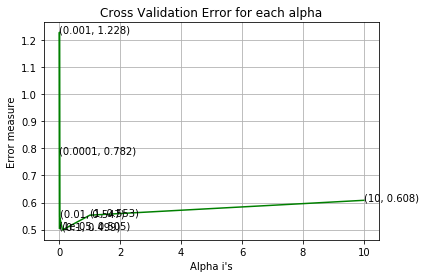

For values of best alpha =  0.1 The train log loss is: 0.43116409874272005
For values of best alpha =  0.1 The test log loss is: 0.49895200560259007
Total number of data points : 29999


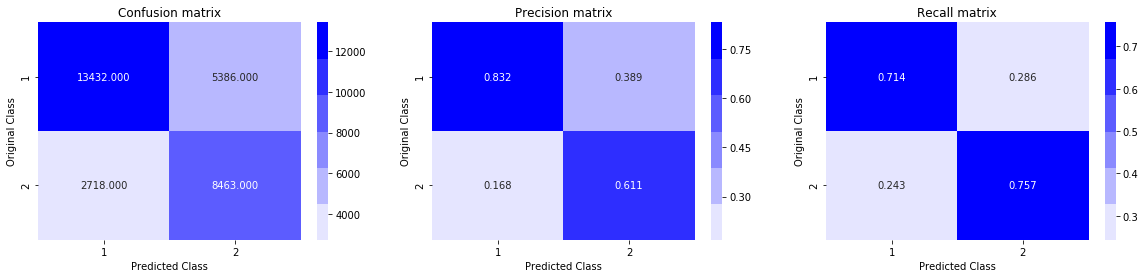

Time taken for creation of dataframe is 0:02:35.046433


In [33]:
startTime = datetime.datetime.now()
print("Current Time = ",startTime)

alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train_tfidf, y_train_tfidf)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_tfidf, y_train_tfidf)
    predict_y = sig_clf.predict_proba(X_test_tfidf)
    log_error_array.append(log_loss(y_test_tfidf, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test_tfidf, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_tfidf, y_train_tfidf)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_tfidf, y_train_tfidf)

predict_y = sig_clf.predict_proba(X_train_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_tfidf, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_tfidf, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_tfidf, predicted_y)

print("Time taken for creation of dataframe is {}".format(datetime.datetime.now() - startTime))

<h2> Linear SVM with hyperparameter tuning </h2>

Current Time =  2019-05-15 16:02:00.070589
For values of alpha =  1e-05 The log loss is: 0.49856494173314964
For values of alpha =  0.0001 The log loss is: 0.541283329412915
For values of alpha =  0.001 The log loss is: 0.48380995234132207
For values of alpha =  0.01 The log loss is: 0.6316405940658874
For values of alpha =  0.1 The log loss is: 0.6598254626208729
For values of alpha =  1 The log loss is: 0.6603846901367277
For values of alpha =  10 The log loss is: 0.6603836463545636


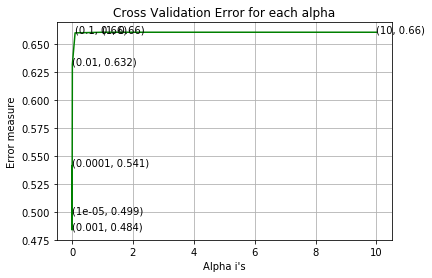

For values of best alpha =  0.001 The train log loss is: 0.4381700544187956
For values of best alpha =  0.001 The test log loss is: 0.48380995234132207
Total number of data points : 29999


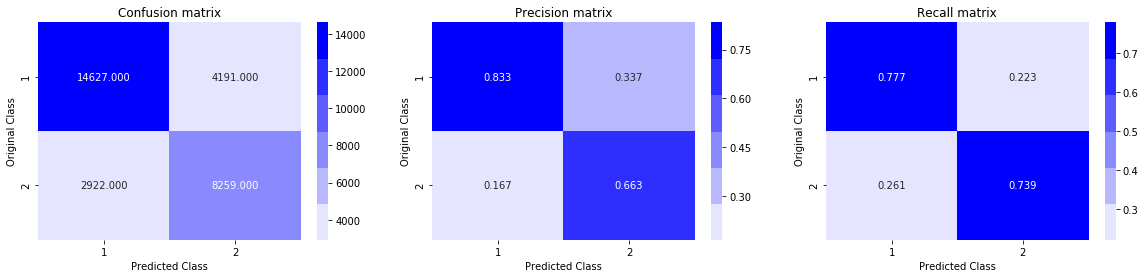

Time taken for creation of dataframe is 0:04:08.140769


In [34]:
startTime = datetime.datetime.now()
print("Current Time = ",startTime)

alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train_tfidf, y_train_tfidf)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_tfidf, y_train_tfidf)
    predict_y = sig_clf.predict_proba(X_test_tfidf)
    log_error_array.append(log_loss(y_test_tfidf, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test_tfidf, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train_tfidf, y_train_tfidf)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_tfidf, y_train_tfidf)

predict_y = sig_clf.predict_proba(X_train_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_tfidf, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_tfidf, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test_tfidf, predicted_y)

print("Time taken for creation of dataframe is {}".format(datetime.datetime.now() - startTime))

In [42]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Paramters/Models","Logistic Regression", "SVM"]

x.add_row(["train log loss (tfidf): ", "0.43116409874272005", "0.4381700544187956"])
x.add_row(["test log loss (tfidf) : ", "0.49895200560259007", "0.48380995234132207"])

print(x)

+--------------------------+---------------------+---------------------+
|     Paramters/Models     | Logistic Regression |         SVM         |
+--------------------------+---------------------+---------------------+
| train log loss (tfidf):  | 0.43116409874272005 |  0.4381700544187956 |
| test log loss (tfidf) :  | 0.49895200560259007 | 0.48380995234132207 |
+--------------------------+---------------------+---------------------+
